In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/IPCV/sunflower.jpg')


In [ ]:
# Get the height and width of the image:
height, width = img.shape[:2]


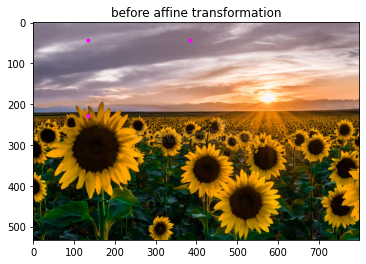

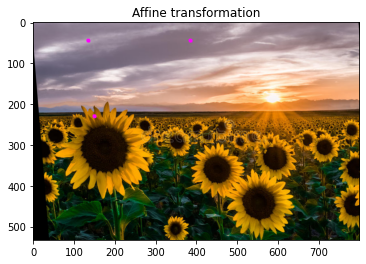

In [ ]:
# 4. Affine Transformation
# In an affine transformation we first make use of the function cv2.getAffineTransform()
# to build the 2x3 transformation matrix, which is obtained from the relation between three points
# from the input image and their corresponding coordinates in the transformed image.

# A copy of the image is created to show the points that will be used for the affine transformation:
image_points = img.copy()
cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)

# Show the image with the three created points:
show_with_matplotlib(image_points, 'before affine transformation')

# We create the arrays with the aforementioned three points and the desired positions in the output image:
pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])

# We get the 2x3 tranformation matrix based on pts_1 and pts_2 and apply cv2.warpAffine():
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

# Show the image:
show_with_matplotlib(dst_image, 'Affine transformation')

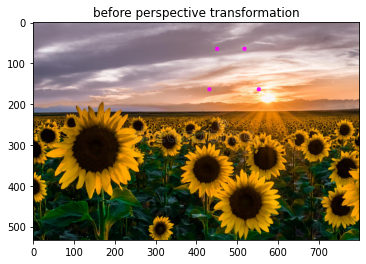

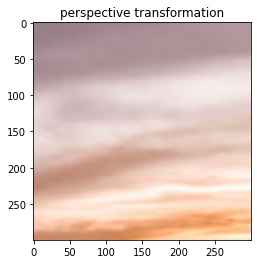

In [ ]:
# Perspective transformation
# A copy of the image is created to show the points that will be used for the perspective transformation:
image_points = img.copy()
cv2.circle(image_points, (450, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (517, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (431, 164), 5, (255, 0, 255), -1)
cv2.circle(image_points, (552, 164), 5, (255, 0, 255), -1)

# Show the image:
show_with_matplotlib(image_points, 'before perspective transformation')

# cv2.getPerspectiveTransform() needs four pairs of points
# (coordinates of a quadrangle in both the source and output image)
# We create the arrays for these four pairs of points:
pts_1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])
pts_2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# To correct the perspective (also known as perspective transformation) you need to create the transformation matrix
# making use of the function cv2.getPerspectiveTransform(), where a 3x3 matrix is constructed:
M = cv2.getPerspectiveTransform(pts_1, pts_2)

# Then, apply cv2.warpPerspective(), where the source image is transformed applying
# the specified matrix and with a specified size:
dst_image = cv2.warpPerspective(img, M, (300, 300))

# Show the image:
show_with_matplotlib(dst_image, 'perspective transformation')